# 1. 向量链式法则

![](Learn_Pictures/04-自动求导/img.png)

    例子1是一个线性回归的例子，如下图所示。 <x,w> = x转置乘以w

![](Learn_Pictures/04-自动求导/img_1.png)

![](Learn_Pictures/04-自动求导/img_2.png)
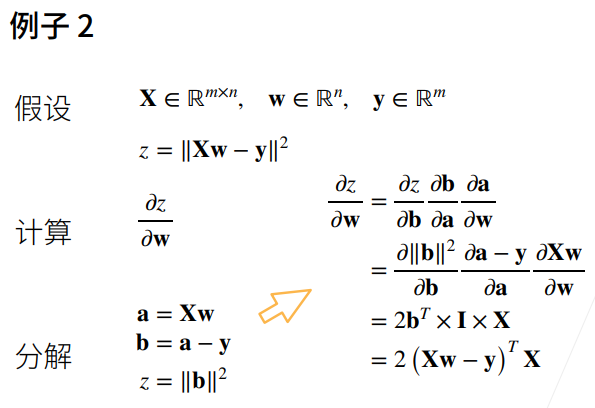

# 2. 自动求导

![](Learn_Pictures/04-自动求导/img_3.png)

# 3. 计算图

![](Learn_Pictures/04-自动求导/img_4.png)

![](Learn_Pictures/04-自动求导/img_5.png)

![](Learn_Pictures/04-自动求导/img_6.png)

# 4. 两种模型

![](Learn_Pictures/04-自动求导/img_7.png)

![](Learn_Pictures/04-自动求导/img_8.png)

    b是之前计算的结果，是一个已知的值。

![](Learn_Pictures/04-自动求导/img_9.png)

![](Learn_Pictures/04-自动求导/img_10.png)

![](Learn_Pictures/04-自动求导/img_11.png)

![](Learn_Pictures/04-自动求导/img_12.png)
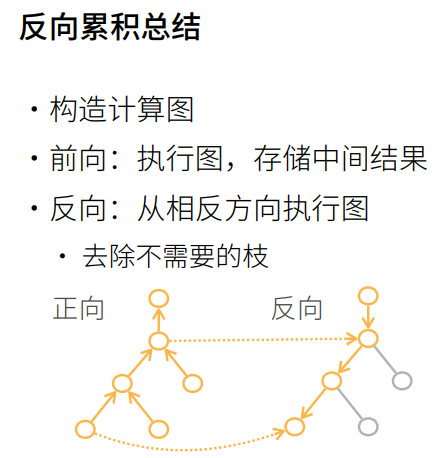

# 5. 复杂度

![](Learn_Pictures/04-自动求导/img_13.png)

# 6. 自动求导
假设想对函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于列向量x求导。

In [1]:
import torch
x = torch.arange(4.0)
print(x)

tensor([0., 1., 2., 3.])


    在外面计算y关于x的梯度之前，需要一个地方来存储梯度。

In [3]:
# requires_grad=True：启用自动微分跟踪，使PyTorch记录所有对此张量的操作
x.requires_grad_(True) # 等价于 x = torch.arange(4.0,requires_grad=True)
print(x.grad) # x.grad是存梯度的地方，默认为None，即还没有求导求出梯度出来

None


    开始计算y

In [34]:
import torch  # 导入PyTorch库

# 创建一个长度为4的一维张量，值为[0.0, 1.0, 2.0, 3.0]，并启用梯度跟踪
# requires_grad=True表示PyTorch会记录对此张量的所有操作以便计算梯度
x = torch.arange(4.0, requires_grad=True)

# 计算y = 2 * (x·x) = 2*(x0^2 + x1^2 + x2^2 + x3^2)
# torch.dot(x, x)计算向量x与自身的点积（内积）
y = 2 * torch.dot(x, x)

# 打印y的值
print(y)
# 输出: tensor(28., grad_fn=<MulBackward0>)
# 虽然显示的是数值28.0，但PyTorch隐式地为y添加了grad_fn属性
# grad_fn是一个计算图节点，记录了创建y的操作（这里是乘法运算）

# 关键注释：
# 1. 当对需要梯度的张量(x)执行操作时，PyTorch会自动构建计算图
# 2. 计算图跟踪操作顺序：输入x → dot操作 → 乘以2操作 → 输出y
# 3. grad_fn属性(这里是<MulBackward0>)包含了反向传播所需的信息
#    在调用y.backward()时，PyTorch将使用它来计算梯度
# 4. 注意：此时还未调用backward()，因此x.grad仍为None

tensor(28., grad_fn=<MulBackward0>)


    通过调用反向传播函数来自动计算y关于x每个分量的梯度。

In [7]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)# 定义计算函数：y = 2 * (x·x) = 2∑xᵢ²
y.backward() # 相当于求导，反向传播后会有梯度计算出来
print(x.grad) # 访问导数，即访问梯度
print(x.grad == 4 * x) # 4 * x 是 2 * x * x 的导数

tensor([ 0.,  4.,  8., 12.])
tensor([True, True, True, True])


    计算x的另一个函数。

In [1]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
y.backward()
# 默认情况下，PyTorch会累积梯度，需要清除之前的值
x.grad.zero_() # y.backward() 后才能产生梯度，才能梯度清零，没有反向传播，无法梯度清零
y = x.sum() # 这里的y是一个标量，sum函数其实就是 y = x₀ + x₁ + x₂ + x₃，对x求偏导，1，1，1，1
y.backward()
print(x.grad)

tensor([1., 1., 1., 1.])


    在深度学习中，目的不是计算微分矩阵，而是批量中每个样本单独计算的偏导数之和。

In [19]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
y.backward()
# 默认情况下，PyTorch会累积梯度，需要清除之前的值
# 对非标量调用 'backward' 需要传入一个 'gradient' 参数，该参数指定微分函数
x.grad.zero_()
y = x * x # 这里的y不是一个标量，这是一个向量
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward() # y.sum()后就讲向量转为标量了，对标量求导
print(x.grad)

tensor([0., 2., 4., 6.])


     将某些计算移动到记录的计算图之外。

In [28]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
y.backward()
x.grad.zero_()
y = x * x
u = y.detach() # y.detach把y当作一个常数，而不是关于x的一个函数
z = u * x
print(y)
print(u)
z.sum().backward()
x.grad == u

tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>)
tensor([0., 1., 4., 9.])


tensor([True, True, True, True])

In [29]:
import torch
x = torch.arange(4.0,requires_grad=True)
y = 2 * torch.dot(x,x)
y.backward()
x.grad.zero_()
y = x * x  # 这里的y是关于x的函数
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

    即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），仍然可以计算得到的变量的梯度。

In [33]:
import torch

def f(a):
    # 将输入a乘以2得到初始值b
    b = a * 2

    # 循环：当b的范数（绝对值）小于1000时，不断将b乘以2
    # 这会使b的值指数增长，直到|b| ≥ 1000
    while b.norm() < 1000:
        b = b * 2

    # 条件判断：如果b的求和结果大于0
    # 注意：当b是标量时，sum()就是它本身的值
    if b.sum() > 0:
        c = b  # b为正数时，c设为b
    else:
        c = 100 * b  # b为负数时，c设为100倍的b

    return c

# 创建一个标量随机数张量（尺寸为()表示标量），并启用梯度跟踪
a = torch.randn(size=(), requires_grad=True)

# 调用函数f，计算结果赋值给d
d = f(a)

# 反向传播计算梯度
d.backward()

# 验证梯度值：检查a的梯度是否等于d除以a
# 这是因为函数f本质上是一个线性变换（缩放操作）
# 所以导数应该是输出与输入的比值
print(a.grad == d / a) # d是a的线性函数，所以导数就是斜率d/a

tensor(True)
